# 範例說明: 
         ConvNetJS CIFAR-10 demo
        
預期目標:
    
    了解網路各層的變化
    
    超參數設定對於預測結果的影響

# 作業:(所有作業需要在ConvNetJS 的網頁上完成)
    
https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html
   
(1)嘗試新增一組卷積+池化層 (CONV + Pool)

(2)嘗試超參數


# 超參數 (hyper parameter) 跟 新增網路更動

[comment]: ![Hyperparameter_HW.png](attachment:Hyperparameter_HW.png)

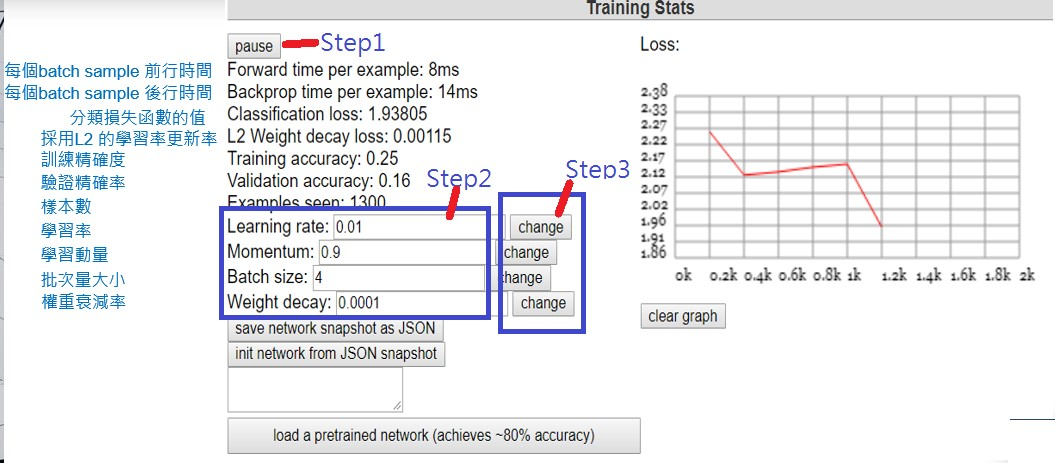

In [1]:
from IPython.display import Image
Image("config_param_demo_1.jpg")

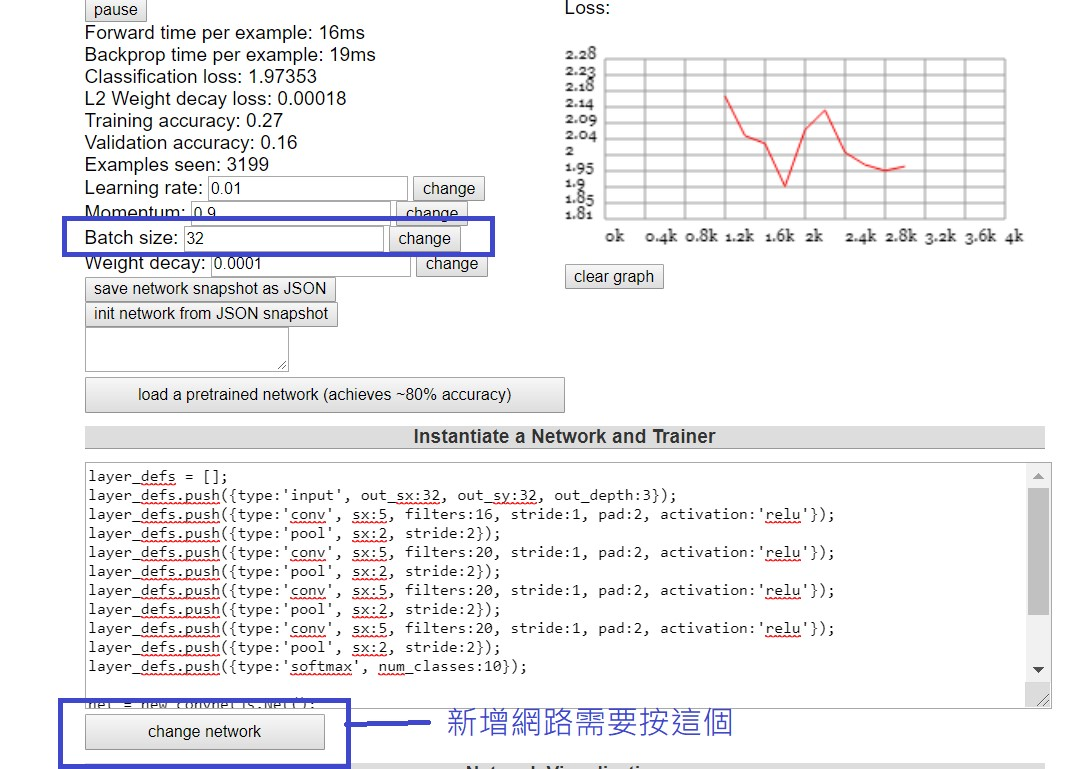

In [2]:
Image("config_param_demo_2.jpg")

**(0)原始設定**

ref: [ConvNetJS CIFAR-10 demo](https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html)

*default initial network*

<blockquote>
    
```javascript
    layer_defs = [];
    layer_defs.push({type:'input', out_sx:32, out_sy:32, out_depth:3});
    layer_defs.push({type:'conv', sx:5, filters:16, stride:1, pad:2, activation:'relu'});
    layer_defs.push({type:'pool', sx:2, stride:2});
    layer_defs.push({type:'conv', sx:5, filters:20, stride:1, pad:2, activation:'relu'});
    layer_defs.push({type:'pool', sx:2, stride:2});
    layer_defs.push({type:'conv', sx:5, filters:20, stride:1, pad:2, activation:'relu'});
    layer_defs.push({type:'pool', sx:2, stride:2});
    layer_defs.push({type:'softmax', num_classes:10});

    net = new convnetjs.Net();
    net.makeLayers(layer_defs);

    trainer = new convnetjs.SGDTrainer(net, {method:'adadelta', batch_size:4, l2_decay:0.0001});
```

</blockquote>



*加註說明*

<blockquote>

```javascript
    # 定義網路起始
    layer_defs = [];  
    
    # 建立DATA 輸入層, 維度: 32x32x3
    layer_defs.push({type:'input', out_sx:32, out_sy:32, out_depth:3});
    
    # 建立卷積層1,該層將使用16個內核執行卷積，每個內核大小為5x5。 
    # 移動步數為1,輸入將在所有邊上填充2個像素以使輸出Vol具有相同的大小 , 激活函數為 ReLU
    layer_defs.push({type:'conv', sx:5, filters:16, stride:1, pad:2, activation:'relu’});

    # 建立池化層1,每個池化內核大小為2x2,移動步數為2
    layer_defs.push({type:'pool', sx:2, stride:2});

    # 建立卷積層2,該層將使用20個內核執行卷積，每個內核大小為5x5。 
    # 移動步數為1,輸入將在所有邊上填充2個像素以使輸出Vol具有相同的大小 , 激活函數為 ReLU
    layer_defs.push({type:'conv', sx:5, filters:20, stride:1, pad:2, activation:'relu’});

    # 建立池化層2,每個池化內核大小為2x2,移動步數為2
    layer_defs.push({type:'pool', sx:2, stride:2});

    # 建立卷積層3,該層將使用20個內核執行卷積，每個內核大小為5x5。 
    # 移動步數為1,輸入將在所有邊上填充2個像素以使輸出Vol具有相同的大小 , 激活函數為 ReLU
    layer_defs.push({type:'conv', sx:5, filters:20, stride:1, pad:2, activation:'relu’});

    # 建立池化層3,每個池化內核大小為2x2,移動步數為2
    layer_defs.push({type:'pool', sx:2, stride:2});

    # 輸出Vol的大小為1x1x10 
    layer_defs.push({type:'softmax', num_classes:10});

    # 指定NET 為一個輸出網路 
    net = new convnetjs.Net();

    # 執行並建立網路 
    net.makeLayers(layer_defs);

    # 執行網路訓練, 優化器採用adadelta, batch_size=4, l2_decay (l2,每次更新時學習率下降)=0.0001
    trainer = new convnetjs.SGDTrainer(net, {method:'adadelta', batch_size:4, l2_decay:0.0001});
```

</blockquote>

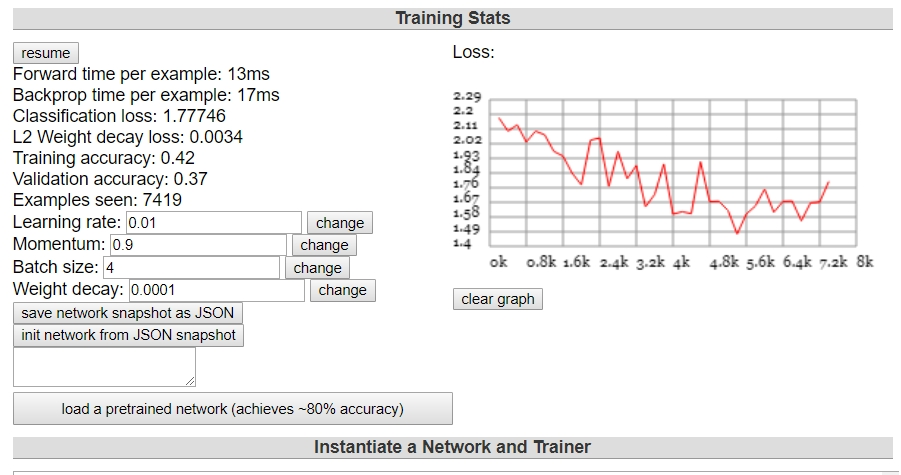

In [3]:
Image("result_default_config.jpg")

**(1)嘗試新增一組卷積+池化層 (CONV + Pool)**

*新增一組卷積(Conv4)及池化層(Pool4)*

<blockquote>

```javascript
    # 定義網路起始
    layer_defs = [];  
    
    # 建立DATA 輸入層, 維度: 32x32x3
    layer_defs.push({type:'input', out_sx:32, out_sy:32, out_depth:3});
    
    # 建立卷積層1,該層將使用16個內核執行卷積，每個內核大小為5x5。 
    # 移動步數為1,輸入將在所有邊上填充2個像素以使輸出Vol具有相同的大小 , 激活函數為 ReLU
    layer_defs.push({type:'conv', sx:5, filters:16, stride:1, pad:2, activation:'relu’});

    # 建立池化層1,每個池化內核大小為2x2,移動步數為2
    layer_defs.push({type:'pool', sx:2, stride:2});

    # 建立卷積層2,該層將使用20個內核執行卷積，每個內核大小為5x5。 
    # 移動步數為1,輸入將在所有邊上填充2個像素以使輸出Vol具有相同的大小 , 激活函數為 ReLU
    layer_defs.push({type:'conv', sx:5, filters:20, stride:1, pad:2, activation:'relu’});

    # 建立池化層2,每個池化內核大小為2x2,移動步數為2
    layer_defs.push({type:'pool', sx:2, stride:2});

    # 建立卷積層3,該層將使用20個內核執行卷積，每個內核大小為5x5。 
    # 移動步數為1,輸入將在所有邊上填充2個像素以使輸出Vol具有相同的大小 , 激活函數為 ReLU
    layer_defs.push({type:'conv', sx:5, filters:20, stride:1, pad:2, activation:'relu’});

    # 建立池化層3,每個池化內核大小為2x2,移動步數為2
    layer_defs.push({type:'pool', sx:2, stride:2});

    # 建立卷積層4,該層將使用20個內核執行卷積，每個內核大小為5x5。 
    # 移動步數為1,輸入將在所有邊上填充2個像素以使輸出Vol具有相同的大小 , 激活函數為 ReLU
    layer_defs.push({type:'conv', sx:5, filters:20, stride:1, pad:2, activation:'relu’});

    # 建立池化層4,每個池化內核大小為2x2,移動步數為2
    layer_defs.push({type:'pool', sx:2, stride:2});

    # 輸出Vol的大小為1x1x10 
    layer_defs.push({type:'softmax', num_classes:10});

    # 指定NET 為一個輸出網路 
    net = new convnetjs.Net();

    # 執行並建立網路 
    net.makeLayers(layer_defs);

    # 執行網路訓練, 優化器採用adadelta, batch_size=4, l2_decay (l2,每次更新時學習率下降)=0.0001
    trainer = new convnetjs.SGDTrainer(net, {method:'adadelta', batch_size:4, l2_decay:0.0001});
```

</blockquote>

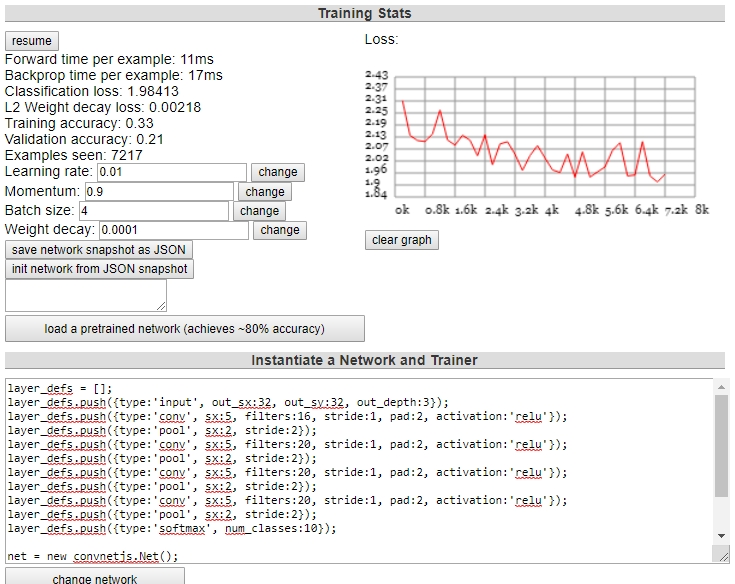

In [4]:
Image("result_add_layer.jpg")

**(2)嘗試超參數**

Learning rate: 0.1 => 0.001  
Batch_size   : 4   => 16

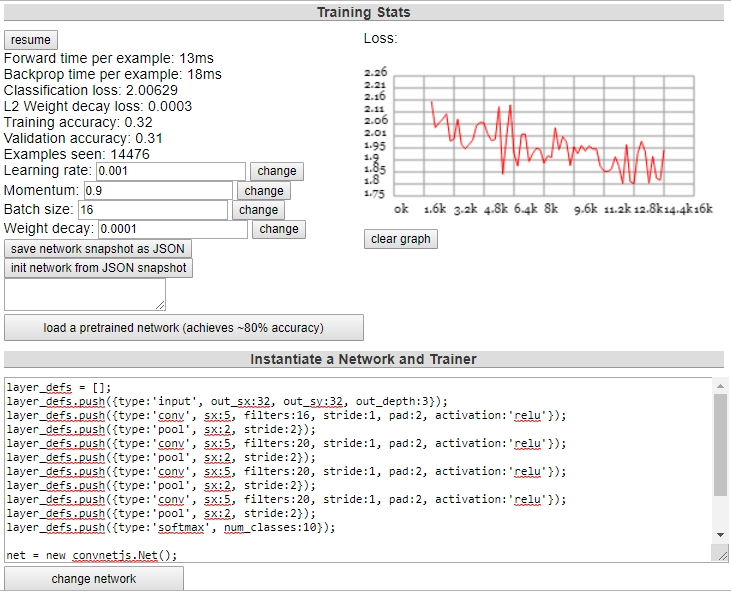

In [5]:
Image("result_change_hyperparam.jpg")

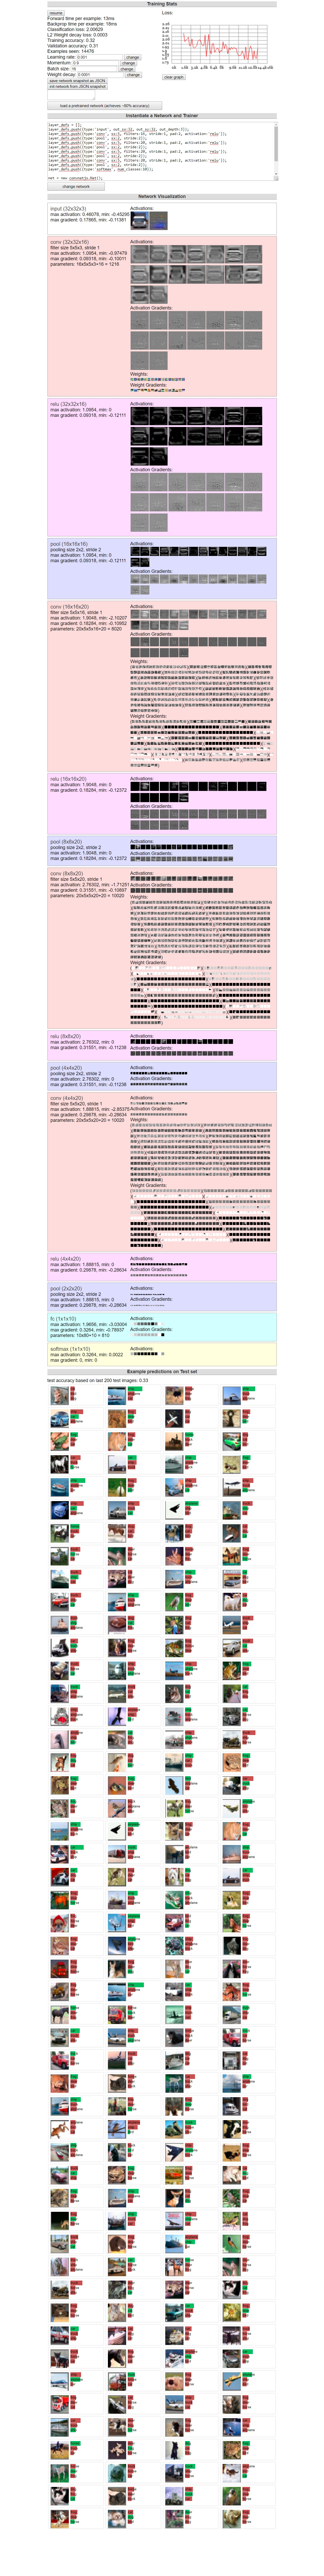

In [6]:
Image("result_change_hyperparam_detail.jpg")